##### import os
from collections import OrderedDict,Counter,defaultdict
import collections
from __future__ import division
import pandas as pd
import numpy as np
import vcf
from operator import itemgetter
import random
import math
from os import path as op
from os import listdir as ls
from IPython.display import display

In [219]:
import skbio

In [220]:
from skbio.stats.distance import mantel


In [223]:
print skbio.__version__

0.4.2


# do for 8 pops

In [33]:
os.makedirs("/home/lindb/wbp/overall_freqshifts/8pops")

In [10]:
impMAF = pd.read_csv("/home/lindb/wbp/OutFLANK/imputed_MAF.txt",header=0,index_col=0,sep='\t')
impMAF.head()

,Dicks_Pass,Freel_Peak,Heavenly,Little_Round_Top,Mt_Rose_Ophir,Rifle_Peak,Snow_Valley_Peak,West_Shore_Peaks
NODE_1000013_length_91_cov_1.802198_37,0.14,0.052083,0.14,0.16,0.112245,0.1250,0.145833,0.166667
NODE_1000031_length_98_cov_2.000000_30,0.26,0.104167,0.18,0.20,0.081633,0.1250,0.145833,0.229167
NODE_1000037_length_93_cov_2.043011_33,0.08,0.114583,0.14,0.16,0.102041,0.1250,0.166667,0.125000
NODE_1000042_length_93_cov_1.118280_100,0.06,0.020833,0.08,0.02,0.051020,0.0000,0.041667,0.062500
NODE_1000053_length_94_cov_1.744681_25,0.02,0.020833,0.04,0.02,0.010204,0.0625,0.020833,0.020833


In [150]:
locDict8['NODE_1000013_length_91_cov_1.802198_37']

0.027210884354000001

In [38]:
loccount =0
meds = []
DIR = "/home/lindb/wbp/overall_freqshifts/8pops"
for locus in impMAF.index:
    df = pd.DataFrame(index=impMAF.columns,columns=impMAF.columns)
    vals = []
    for i,popi in enumerate(impMAF.columns):
        freqi = impMAF.loc[locus,popi]
        for j,popj in enumerate(impMAF.columns):
            if i ==j:
                df.loc[popi,popj] = 0
            if i < j:
                freqj = impMAF.loc[locus,popj]
                diff = abs(freqi-freqj)
                df.loc[popi,popj] = diff
                df.loc[popj,popi] = df.loc[popi,popj]
                vals.append(diff)
    assert len(vals) == 28
    med = np.median(vals)
    meds.append(med)
    
    filE = op.join(DIR,'%s.txt' % locus)
    df.to_csv(filE,header=True,index=True,sep='\t')
    
    loccount +=1 
    if loccount % 10000 == 0:
        print loccount

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


In [41]:
DIR = "/home/lindb/wbp/overall_freqshifts/8pops"
filE = op.join(DIR,'medianvals.txt')
df = pd.DataFrame(meds)
df.to_csv(filE,header=False,index=False,sep='\t')

In [42]:
len(df.index)

116231

In [52]:
filE = "/home/lindb/wbp/overall_freqshifts/8pops/medianvals.txt"
df = pd.read_csv(filE,header=None,sep='\t')
p8medvals = df[0].tolist()
len(p8medvals)

116231

In [54]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
%matplotlib inline

In [59]:
max(p8medvals)

0.22395833333299997

<a list of 49 Patch objects>

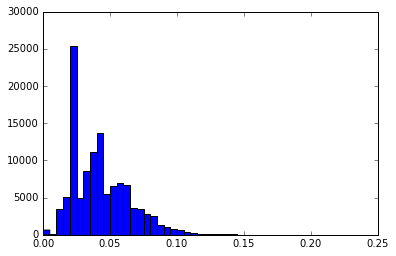

In [62]:
plt.hist(p8medvals,bins = [x for x in np.arange(0,.25,0.005)])[2]

In [89]:
locDict8 = OrderedDict()
DIR = '/home/lindb/wbp/overall_freqshifts/8pops/'
files = [op.join(DIR,f) for f in ls(DIR) if ('NODE' in f) and ('swp' not in f)]
op.basename(files[0]).split(".txt")[0]

'NODE_1964998_length_94_cov_1.000000_24'

In [91]:
loccount =0
for f in sorted(files):
    locus = op.basename(f).split(".txt")[0]
    df = pd.read_csv(f,header=0,index_col=0,sep='\t')
    vals = []
    for i,popi in enumerate(df.columns):
        for j,popj in enumerate(df.index):
            if i < j:
                vals.append(df.loc[popi,popj])
    locDict8[locus] = np.median(vals)
    loccount += 1
    if loccount % 10000 == 0:
        print loccount

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


### get bayenv2 SNPs

In [50]:
DIR = '/home/lindb/wbp/bayenv2/results/sigsnps'
files = [op.join(DIR,f) for f in ls(DIR)]
bayDict = OrderedDict()
for f in sorted(files):
    env = op.basename(f).split("_")[0]
    df = pd.read_csv(f,header=0,sep='\t')
    bayDict[env] = df[env].tolist()
    print env,len(bayDict[env])

AWS0-25 95
AWS0-50 147
Ann-ppt 49
CEC 14
Clay 22
Elev 143
GDD-Aug 157
GDD-May 80
Lat 119
Lon 67
Max-rad-input 144
Rock-cov 143
Sand 111
Silt 140
Tmax-July 50
Tmin-Jan 116
WC15Bar 86
WC3rdbar 97


In [84]:
len(locDict8.keys())

116231

In [94]:
bayDict.keys()[0:9]

['AWS0-25',
 'AWS0-50',
 'Ann-ppt',
 'CEC',
 'Clay',
 'Elev',
 'GDD-Aug',
 'GDD-May',
 'Lat']

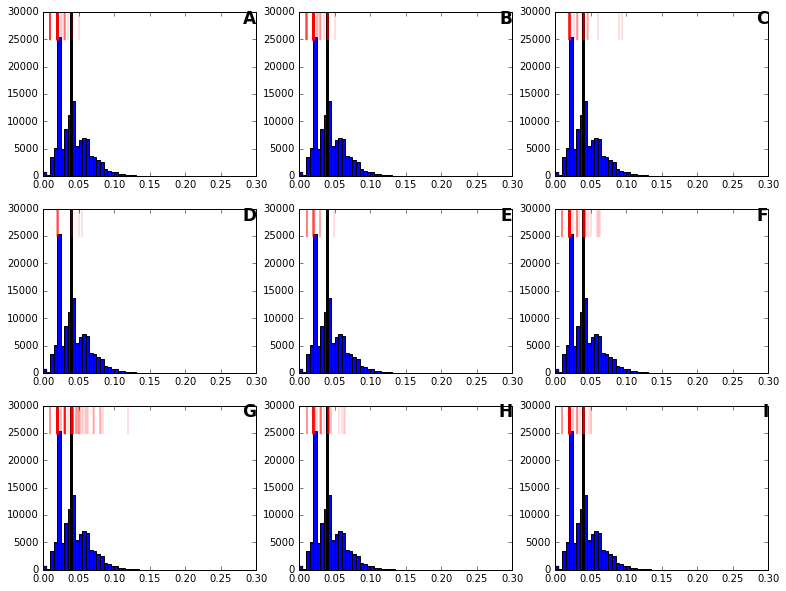

In [112]:
lst = ['A','B','C','D','E','F','G','H','I']
col = 'red'
with PdfPages('/home/lindb/wbp/figures/allele_freq_shifts_bayenv2_AWS0-Lat.pdf') as pdf:
    
    plt.close('all')
    fig, ((a1,a2,a3),(a4,a5,a6),(a7,a8,a9)) = plt.subplots(3, 3, figsize=(5,5),dpi=400)
    
    plotdict = {}
    count = 1
    for env in sorted(bayDict.keys())[0:9]:
        plotdict[count] = plt.subplot(int("33%s" % count))

        plotdict[count].hist(p8medvals,bins = [x for x in np.arange(0,.25,0.005)])[2]

        plotdict[count].set_title(lst[count-1],y=.9,loc='right',fontsize=17,fontweight='bold')
        
        plotdict[count].set_xlim(0,0.3)
        plotdict[count].set_ylim(0,30000)
        plotdict[count].axvline(x=np.median(p8medvals),c='black',linewidth=3,zorder=1)
        
        for SNP in bayDict[env]:
            plotdict[count].axvline(x=locDict8[SNP],ymin=0.83,c=col,linewidth=0.25,zorder=2)
        
        count += 1

    fig.set_size_inches(13,10)
    pdf.savefig(fig,bbox_inches='tight')

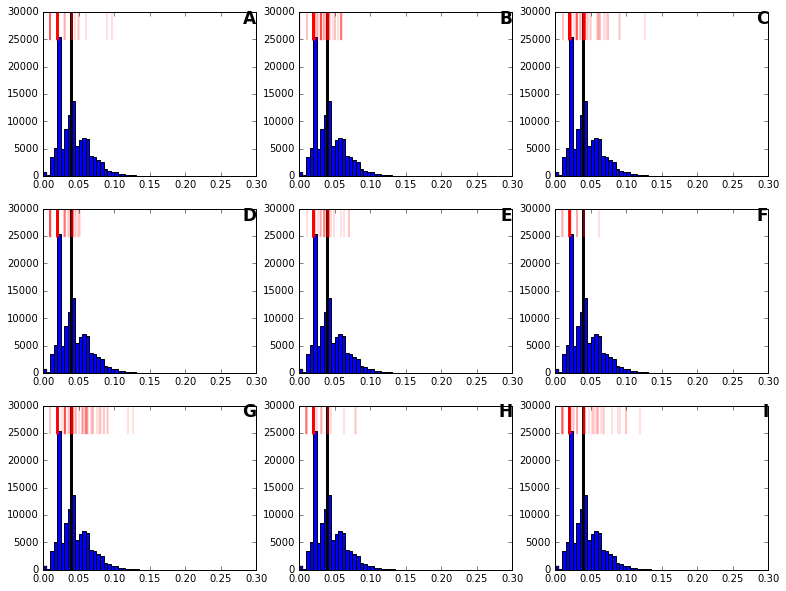

In [117]:
lst = ['A','B','C','D','E','F','G','H','I']
col = 'red'
with PdfPages('/home/lindb/wbp/figures/allele_freq_shifts_bayenv2_Lon-WC3rdbar.pdf') as pdf:
    
    plt.close('all')
    fig, ((a1,a2,a3),(a4,a5,a6),(a7,a8,a9)) = plt.subplots(3, 3, figsize=(5,5),dpi=400)
    
    plotdict = {}
    count = 1
    for env in sorted(bayDict.keys())[9:]:
        plotdict[count] = plt.subplot(int("33%s" % count))

        plotdict[count].hist(p8medvals,bins = [x for x in np.arange(0,.25,0.005)])[2]

        plotdict[count].set_title(lst[count-1],y=.9,loc='right',fontsize=17,fontweight='bold')
        
        plotdict[count].set_xlim(0,0.3)
        plotdict[count].set_ylim(0,30000)
        
        plotdict[count].axvline(x=np.median(p8medvals),c='black',linewidth=3,zorder=1)
        
        for SNP in bayDict[env]:
            plotdict[count].axvline(x=locDict8[SNP],ymin=0.83,c=col,linewidth=0.25,zorder=1)
            
#         plotdict[count].locator_params(axis='x',nbins=5)
#         for tick in plotdict[count].xaxis.get_major_ticks():
#                tick.label.set_fontsize(8)
        
#         if count == 6:
#             plotdict[count].spines['right'].set_visible(False)
#             plotdict[count].spines['left'].set_visible(False)
#             plotdict[count].spines['top'].set_visible(False)
#             plotdict[count].spines['bottom'].set_visible(False)
#             plotdict[count].axes.get_yaxis().set_visible(False)
#             plotdict[count].axes.get_xaxis().set_ticks([])
#             plotdict[count].axes.get_yaxis().set_ticks([])
        
        count += 1

    fig.set_size_inches(13,10)
    pdf.savefig(fig,bbox_inches='tight')

In [118]:
res = []
for env in bayDict:
    count = 0
    for SNP in bayDict[env]:
        if locDict8[SNP] <= np.median(p8medvals):
            count += 1
    print env, count,count/len(bayDict[env])
    res.append(count/len(bayDict[env]))
np.median(res)

AWS0-25 92 0.968421052632
AWS0-50 139 0.945578231293
Ann-ppt 35 0.714285714286
CEC 10 0.714285714286
Clay 21 0.954545454545
Elev 121 0.846153846154
GDD-Aug 108 0.687898089172
GDD-May 62 0.775
Lat 103 0.865546218487
Lon 54 0.805970149254
Max-rad-input 117 0.8125
Rock-cov 99 0.692307692308
Sand 95 0.855855855856
Silt 122 0.871428571429
Tmax-July 44 0.88
Tmin-Jan 64 0.551724137931
WC15Bar 74 0.860465116279
WC3rdbar 64 0.659793814433


0.82932692307692313

In [126]:
#get a list of 1000 sets of random SNPs for each environment
#these SNPs were drawn randomly in 08_bayenv2.ipynb for identification of significant covariation
DIR = '/home/lindb/wbp/bayenv2/covariances/randmatrices/randsnps'
DIRS = [op.join(DIR,d) for d in ls(DIR)]
bayrand = {}
for d in DIRS:
    env = op.basename(d)
    print env
    bayrand[env] = {}
    files = [op.join(d,f) for f in ls(d)]
    for f in sorted(files):
        num = op.basename(f).split("_")[1]
        df = pd.read_csv(f,header=None,sep='\t')
        bayrand[env][num] = df[0].tolist()

AWS0-25
AWS0-50
Ann-ppt
CEC
Clay
Elev
GDD-Aug
GDD-May
Lat
Lon
Max-rad-input
Rock-cov
Sand
Silt
Tmax-July
Tmin-Jan
WC15Bar
WC3rdbar


In [160]:
#get a distribution from these 1000 sets for each env
randmeds = {}
for env in bayrand:
    randmeds[env] = []
    for num in bayrand[env]:
        randmeds[env].append(np.mean([float(locDict8[SNP]) for SNP in bayrand[env][num]]))           

In [161]:
np.round(np.mean([locDict8[snp] for snp in bayrand[env][num]]),5)

0.019740000000000001

In [162]:
sorted([locDict8[snp] for snp in bayrand[env][num]])

[0.0102040816327,
 0.0102040816327,
 0.010310374149649998,
 0.010416666666649997,
 0.010416666666649997,
 0.010416666666649997,
 0.010416666666700001,
 0.010416666666700001,
 0.010416666666700001,
 0.010416666666700001,
 0.010416666666700001,
 0.010416666666700001,
 0.010416666666700001,
 0.010416666666700001,
 0.010416666666700001,
 0.010416666666700001,
 0.010522959183649998,
 0.010629251700599996,
 0.010629251700599996,
 0.010629251700599996,
 0.010931122449,
 0.01125,
 0.019166666666700003,
 0.019166666666700003,
 0.019166666666700003,
 0.019583333333350002,
 0.019583333333350002,
 0.019583333333350002,
 0.019583333333350002,
 0.019583333333350002,
 0.01979591836735,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.020000000000000004,
 0.020204081632650001,
 0.020408163265300001,
 0.020416666666649999,
 0.020416666666649999,
 0.020833333333300001,
 0.0208

<a list of 299 Patch objects>

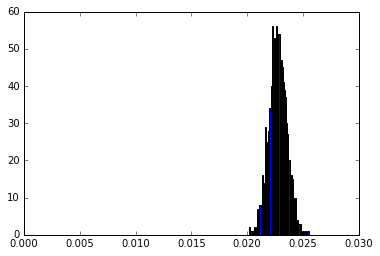

In [174]:
plt.hist(randmeds[env], bins = [x for x in np.arange(0,.03,0.0001)])[2]

<a list of 299 Patch objects>

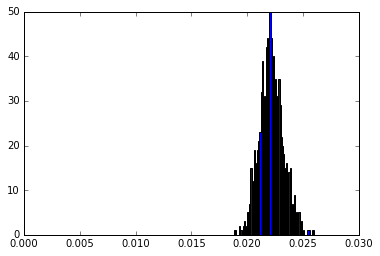

In [175]:
plt.hist(randmeds['Ann-ppt'], bins = [x for x in np.arange(0,.03,0.0001)])[2]

In [171]:
for env in randmeds:
    print env,max(randmeds[env])

Ann-ppt 0.0259200159656
CEC 0.0268731778426
AWS0-25 0.0198723147154
AWS0-50 0.019428363182
Max-rad-input 0.0233125767668
Rock-cov 0.0230355358927
Lon 0.0233174687786
WC3rdbar 0.0254662844519
Tmax-July 0.0217265306122
WC15Bar 0.0213085350419
Sand 0.0218999356499
Tmin-Jan 0.0273998284659
Elev 0.0212802078873
Clay 0.0234562461348
Lat 0.0205569727891
Silt 0.020634930758
GDD-Aug 0.0248137105161
GDD-May 0.0229693346088


In [226]:
for env in randmeds:
    print env, np.mean(randmeds[env]),max(randmeds[env])

Ann-ppt 0.0221404244759 0.0259200159656
CEC 0.0211167738703 0.0268731778426
AWS0-25 0.0178693510562 0.0198723147154
AWS0-50 0.0178568841397 0.019428363182
Max-rad-input 0.02149607072 0.0233125767668
Rock-cov 0.0208916047048 0.0230355358927
Lon 0.0202986227028 0.0233174687786
WC3rdbar 0.0227344562645 0.0254662844519
Tmax-July 0.0189692895408 0.0217265306122
WC15Bar 0.0189693167616 0.0213085350419
Sand 0.0199433797956 0.0218999356499
Tmin-Jan 0.0246946009266 0.0273998284659
Elev 0.0195735424992 0.0212802078873
Clay 0.019209401863 0.0234562461348
Lat 0.0188873432587 0.0205569727891
Silt 0.0192248086127 0.020634930758
GDD-Aug 0.0231356225627 0.0248137105161
GDD-May 0.0205997764137 0.0229693346088


In [169]:
for env in randmeds:
    print env, np.mean([locDict8[SNP] for SNP in bayDict[env]]),np.median([locDict8[SNP] for SNP in bayDict[env]])

Ann-ppt 0.0281886019714 0.0208333333333
CEC 0.0265846695821 0.0208333333333
AWS0-25 0.0199104010025 0.02
AWS0-50 0.0208372668795 0.02
Max-rad-input 0.0269249870087 0.0208333333333
Rock-cov 0.029764164407 0.0208333333333
Lon 0.0243432708904 0.0204081632653
WC3rdbar 0.031672583982 0.0208333333333
Tmax-July 0.021219047619 0.0208333333333
WC15Bar 0.0231406719665 0.02
Sand 0.0238989244346 0.0208333333333
Tmin-Jan 0.0370576765189 0.031356292517
Elev 0.0219846819847 0.0204081632653
Clay 0.0188506880025 0.02
Lat 0.021444077631 0.0204081632653
Silt 0.0243244655005 0.0208333333333
GDD-Aug 0.0308268068374 0.0210289115646
GDD-May 0.0224600871599 0.0208333333333


In [172]:
baymeans = {}
for env in randmeds:
    baymeans[env] = np.mean([locDict8[SNP] for SNP in bayDict[env]])

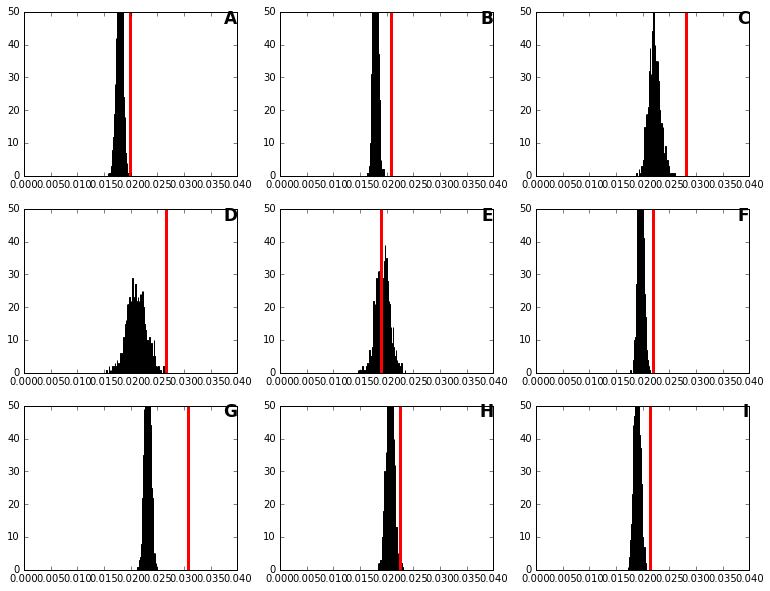

In [225]:
lst = ['A','B','C','D','E','F','G','H','I']
col = 'red'
with PdfPages('/home/lindb/wbp/figures/allele_freq_shifts_bayenv2_hexp_AWS0-Lat.pdf') as pdf:
    
    plt.close('all')
    fig, ((a1,a2,a3),(a4,a5,a6),(a7,a8,a9)) = plt.subplots(3, 3, figsize=(5,5),dpi=400)
    
    plotdict = {}
    count = 1
    for env in sorted(bayDict.keys())[0:9]:
        plotdict[count] = plt.subplot(int("33%s" % count))

        plotdict[count].hist(randmeds[env],bins = [x for x in np.arange(0,.03,0.0001)], color='blue')[2]

        plotdict[count].set_title(lst[count-1],y=.9,loc='right',fontsize=17,fontweight='bold')
        
        plotdict[count].set_xlim(0,0.04)
        plotdict[count].set_ylim(0,50)
        
        plotdict[count].axvline(x=baymeans[env],c='red',linewidth=3,zorder=1)
        
#         for SNP in bayDict[env]:
#             plotdict[count].axvline(x=locDict8[SNP],ymin=0.83,c=col,linewidth=0.25,zorder=1)
        count += 1

    fig.set_size_inches(13,10)
    pdf.savefig(fig,bbox_inches='tight')

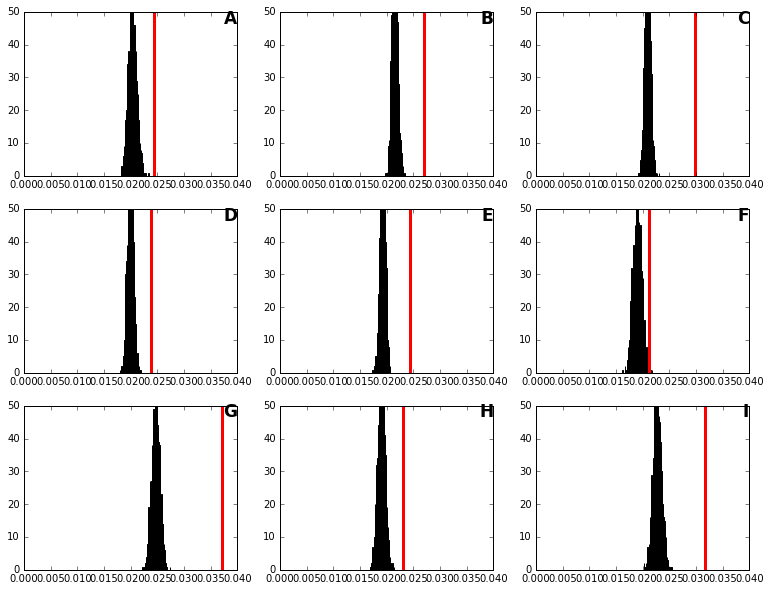

In [205]:
lst = ['A','B','C','D','E','F','G','H','I']
col = 'red'
with PdfPages('/home/lindb/wbp/figures/allele_freq_shifts_bayenv2_hexp_Lon-WC3rdbar.pdf') as pdf:
    
    plt.close('all')
    fig, ((a1,a2,a3),(a4,a5,a6),(a7,a8,a9)) = plt.subplots(3, 3, figsize=(5,5),dpi=400)
    
    plotdict = {}
    count = 1
    for env in sorted(bayDict.keys())[9:]:
        plotdict[count] = plt.subplot(int("33%s" % count))

        plotdict[count].hist(randmeds[env],bins = [x for x in np.arange(0,.03,0.0001)])[2]

        plotdict[count].set_title(lst[count-1],y=.9,loc='right',fontsize=17,fontweight='bold')
        
        plotdict[count].set_xlim(0,0.04)
        plotdict[count].set_ylim(0,50)
        
        plotdict[count].axvline(x=baymeans[env],c='red',linewidth=3,zorder=1)
        
#         for SNP in bayDict[env]:
#             plotdict[count].axvline(x=locDict8[SNP],ymin=0.83,c=col,linewidth=0.25,zorder=1)
        count += 1

    fig.set_size_inches(13,10)
    pdf.savefig(fig,bbox_inches='tight')

# do 6 pops

In [44]:
sixMAF = pd.read_csv('~/wbp/gemma/6pop_pop_maf.txt',header=0,index_col=0,sep='\t')
sixMAF.head()

,Dicks_Pass,Freel_Peak,Little_Round_Top,Mt_Rose_Ophir,Rifle_Peak,Snow_Valley_Peak
NODE_1000013_length_91_cov_1.802198_37,0.066667,0.105263,0.250000,0.272727,0.100000,0.178571
NODE_1000031_length_98_cov_2.000000_30,0.333333,0.078947,0.178571,0.045455,0.100000,0.178571
NODE_1000037_length_93_cov_2.043011_33,0.100000,0.078947,0.071429,0.045455,0.133333,0.142857
NODE_1000042_length_93_cov_1.118280_100,0.000000,0.000000,0.035714,0.000000,0.000000,0.071429
NODE_1000053_length_94_cov_1.744681_25,0.033333,0.000000,0.035714,0.045455,0.033333,0.035714


In [40]:
os.makedirs("/home/lindb/wbp/overall_freqshifts/6pops")

In [47]:
loccount =0
sixmeds = []
DIR = "/home/lindb/wbp/overall_freqshifts/6pops"
for locus in sixMAF.index:
    df = pd.DataFrame(index=sixMAF.columns,columns=sixMAF.columns)
    vals = []
    for i,popi in enumerate(sixMAF.columns):
        freqi = sixMAF.loc[locus,popi]
        for j,popj in enumerate(sixMAF.columns):
            if i ==j:
                df.loc[popi,popj] = 0
            if i < j:
                freqj = sixMAF.loc[locus,popj]
                diff = abs(freqi-freqj)
                df.loc[popi,popj] = diff
                df.loc[popj,popi] = df.loc[popi,popj]
                vals.append(diff)
    assert len(vals) == 15
    sixmed = np.median(vals)
    sixmeds.append(sixmed)
    
    filE = op.join(DIR,'%s.txt' % locus)
    df.to_csv(filE,header=True,index=True,sep='\t')
    
    loccount +=1 
    if loccount % 10000 == 0:
        print loccount

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


In [48]:
len(sixmeds)

115632

In [49]:
DIR = "/home/lindb/wbp/overall_freqshifts/6pops"
filE = op.join(DIR,'medianvals.txt')
df = pd.DataFrame(sixmeds)
df.to_csv(filE,header=False,index=False,sep='\t')

In [185]:
DIR = '/home/lindb/wbp/overall_freqshifts/6pops/'
files = [op.join(DIR,f) for f in ls(DIR) if ('NODE' in f) and ('swp' not in f)]
len(files)

115632

In [186]:
loccount =0
locDict6 = OrderedDict()
for f in sorted(files):
    locus = op.basename(f).split(".txt")[0]
    df = pd.read_csv(f,header=0,index_col=0,sep='\t')
    vals = []
    for i,popi in enumerate(df.columns):
        for j,popj in enumerate(df.index):
            if i < j:
                vals.append(df.loc[popi,popj])
    locDict6[locus] = np.median(vals)
    loccount += 1
    if loccount % 10000 == 0:
        print loccount

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


### get GEMMA snps

In [193]:
DIR = '/home/lindb/wbp/gemma/covariance_pips_998/dvals/'
files = [op.join(DIR,f) for f in ls(DIR)]
gemsnps = {}
for f in sorted(files):
    pheno = op.basename(f).split("_")[0]
    df = pd.read_csv(f,header=0,index_col=0,sep='\t')
    gemsnps[pheno] = df.index.tolist()

In [194]:
for pheno in gemsnps:
    print pheno,len(gemsnps[pheno])

rspopx 234
bfpopx 240
c13popx 240
n15popx 232
htpopx 238


In [195]:
len(locDict6.keys())

115632

In [200]:
#get a list of 1000 sets of random SNPs for each environment
#these SNPs were drawn randomly in 08_bayenv2.ipynb for identification of significant covariation
DIR = '/home/lindb/wbp/gemma/covariance_pips_998/randmatrices/randsnps'
DIRS = [op.join(DIR,d) for d in ls(DIR)]
gemrand = {}
for d in DIRS:
    pheno = op.basename(d)
    print pheno
    gemrand[pheno] = {}
    files = [op.join(d,f) for f in ls(d)]
    for f in sorted(files):
        num = op.basename(f).split("_")[1]
        df = pd.read_csv(f,header=None,sep='\t')
        gemrand[pheno][num] = df[0].tolist()

bfpopx
c13popx
htpopx
n15popx
rspopx


In [202]:
#get a distribution from these 1000 sets for each env
gemrandmeds = {}
for pheno in gemrand:
    gemrandmeds[pheno] = []
    for num in gemrand[pheno]:
        gemrandmeds[pheno].append(np.mean([float(locDict6[SNP]) for SNP in gemrand[pheno][num]]))           

In [212]:
gemmeans = {}
for pheno in gemrand:
    gemmeans[pheno] = np.mean([locDict6[snp] for snp in gemsnps[pheno]])

In [228]:
for pheno in gemrand:
    print pheno, np.mean(gemrandmeds[pheno]),gemmeans[pheno]

 rspopx 0.0795716237953 0.0874907256486
bfpopx 0.0720396990108 0.0727438862307
c13popx 0.0618438402825 0.060935482646
n15popx 0.0589423527471 0.0598448511561
htpopx 0.0569354425502 0.0544943336186


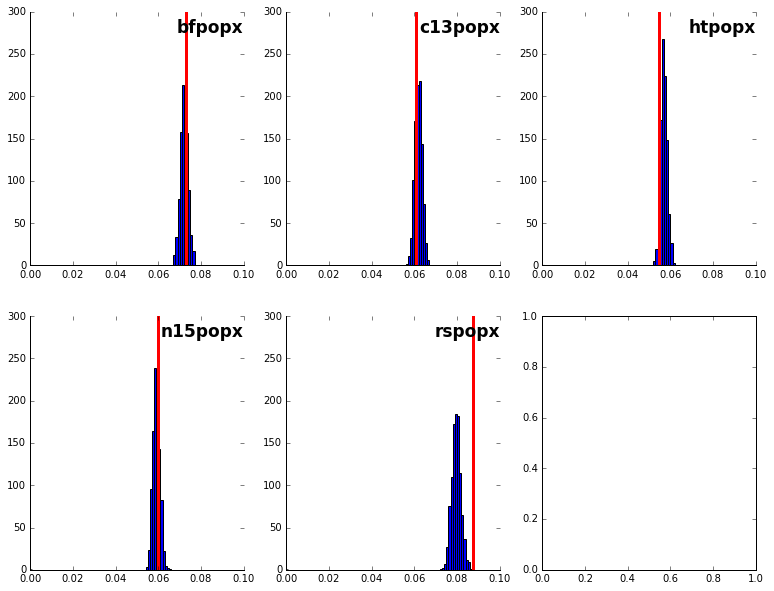

In [218]:
lst = ['A','B','C','D','E','F','G','H','I']
col = 'red'
with PdfPages('/home/lindb/wbp/figures/allele_freq_shifts_hexp_gemma.pdf') as pdf:
    
    plt.close('all')
    fig, ((a1,a2,a3),(a4,a5,a6)) = plt.subplots(2, 3, figsize=(5,5),dpi=400)
    
    plotdict = {}
    count = 1
    for pheno in sorted(gemrand):
        plotdict[count] = plt.subplot(int("23%s" % count))

        plotdict[count].hist(gemrandmeds[pheno],bins = [x for x in np.arange(0,.1,0.001)])[2]

        #plotdict[count].set_title(lst[count-1],y=.9,loc='right',fontsize=17,fontweight='bold')
        plotdict[count].set_title(pheno,y=.9,loc='right',fontsize=17,fontweight='bold')
        
        plotdict[count].set_xlim(0,0.1)
        plotdict[count].set_ylim(0,300)
        plotdict[count].spines["top"].set_visible(False)
        plotdict[count].spines["right"].set_visible(False)
        
        plotdict[count].axvline(x=gemmeans[pheno],c='red',linewidth=3,zorder=1)
        
#         for SNP in bayDict[env]:
#             plotdict[count].axvline(x=locDict8[SNP],ymin=0.83,c=col,linewidth=0.25,zorder=1)
        count += 1

    fig.set_size_inches(13,10)
    pdf.savefig(fig,bbox_inches='tight')

In [214]:
[pheno for pheno in sorted(gemrand)]

['bfpopx', 'c13popx', 'htpopx', 'n15popx', 'rspopx']